In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv("College_Data.csv")

# Select the relevant columns for clustering
selected_columns = ["Apps", "Accept", "Enroll", "Top10perc", "Top25perc", "F.Undergrad", "P.Undergrad", "Outstate", "Room.Board", "Books", "Personal", "PhD", "Terminal", "S.F.Ratio", "perc.alumni", "Expend", "Grad.Rate"]
X = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\cheth\.conda\envs\tf\lib\si

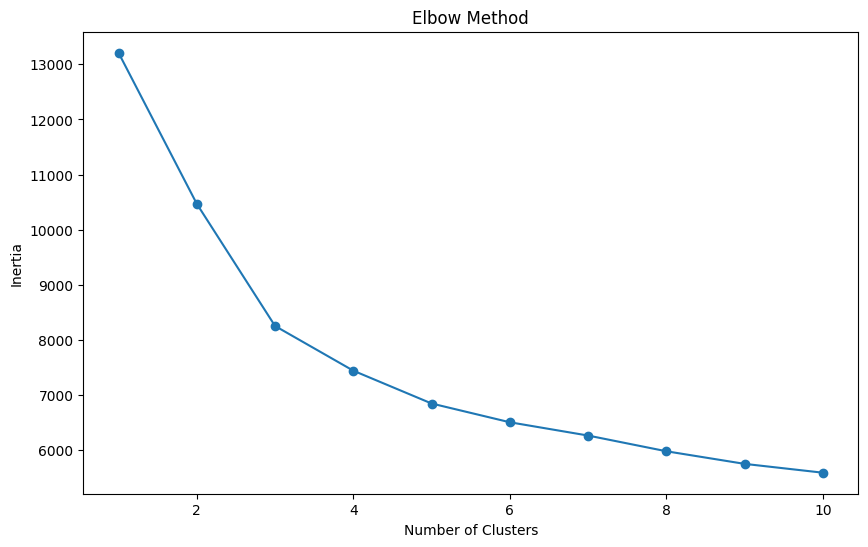

In [3]:
# Find the optimal number of clusters using the elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [4]:
# Choose the optimal number of clusters
optimal_clusters = 10  # Choose based on the elbow method

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters


c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


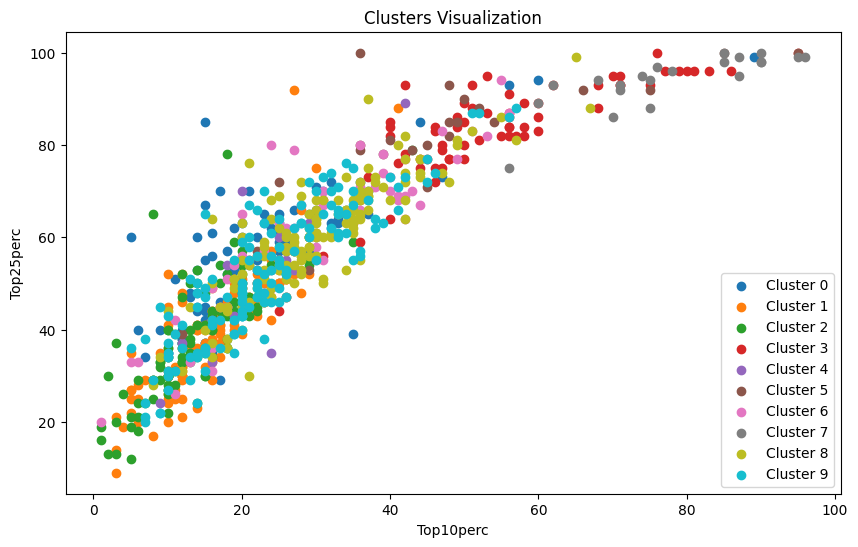

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("College_Data.csv")

# Select the relevant columns for clustering
selected_columns = ["Apps", "Accept", "Enroll", "Top10perc", "Top25perc", "F.Undergrad", "P.Undergrad", "Outstate", "Room.Board", "Books", "Personal", "PhD", "Terminal", "S.F.Ratio", "perc.alumni", "Expend", "Grad.Rate"]
X = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering with 10 clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Top10perc'], cluster_data['Top25perc'], label=f'Cluster {cluster_num}')

plt.xlabel('Top10perc')
plt.ylabel('Top25perc')
plt.title('Clusters Visualization')
plt.legend()
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("College_Data.csv")

# Select the relevant columns for clustering
selected_columns = ["Apps", "Accept", "Enroll", "Top10perc", "Top25perc", "F.Undergrad", "P.Undergrad", "Outstate", "Room.Board", "Books", "Personal", "PhD", "Terminal", "S.F.Ratio", "perc.alumni", "Expend", "Grad.Rate"]
X = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering with 10 clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Create a separate scatter plot for each cluster and save as images
for cluster_num in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(cluster_data['Top10perc'], cluster_data['Top25perc'])
    plt.xlabel('Top10perc')
    plt.ylabel('Top25perc')
    plt.title(f'Cluster {cluster_num} Visualization')
    plt.savefig(f'cluster_{cluster_num}_scatter.png')
    plt.close()  # Close the current plot to avoid overlap

print("Scatter plots saved as images.")


c:\Users\cheth\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Scatter plots saved as images.


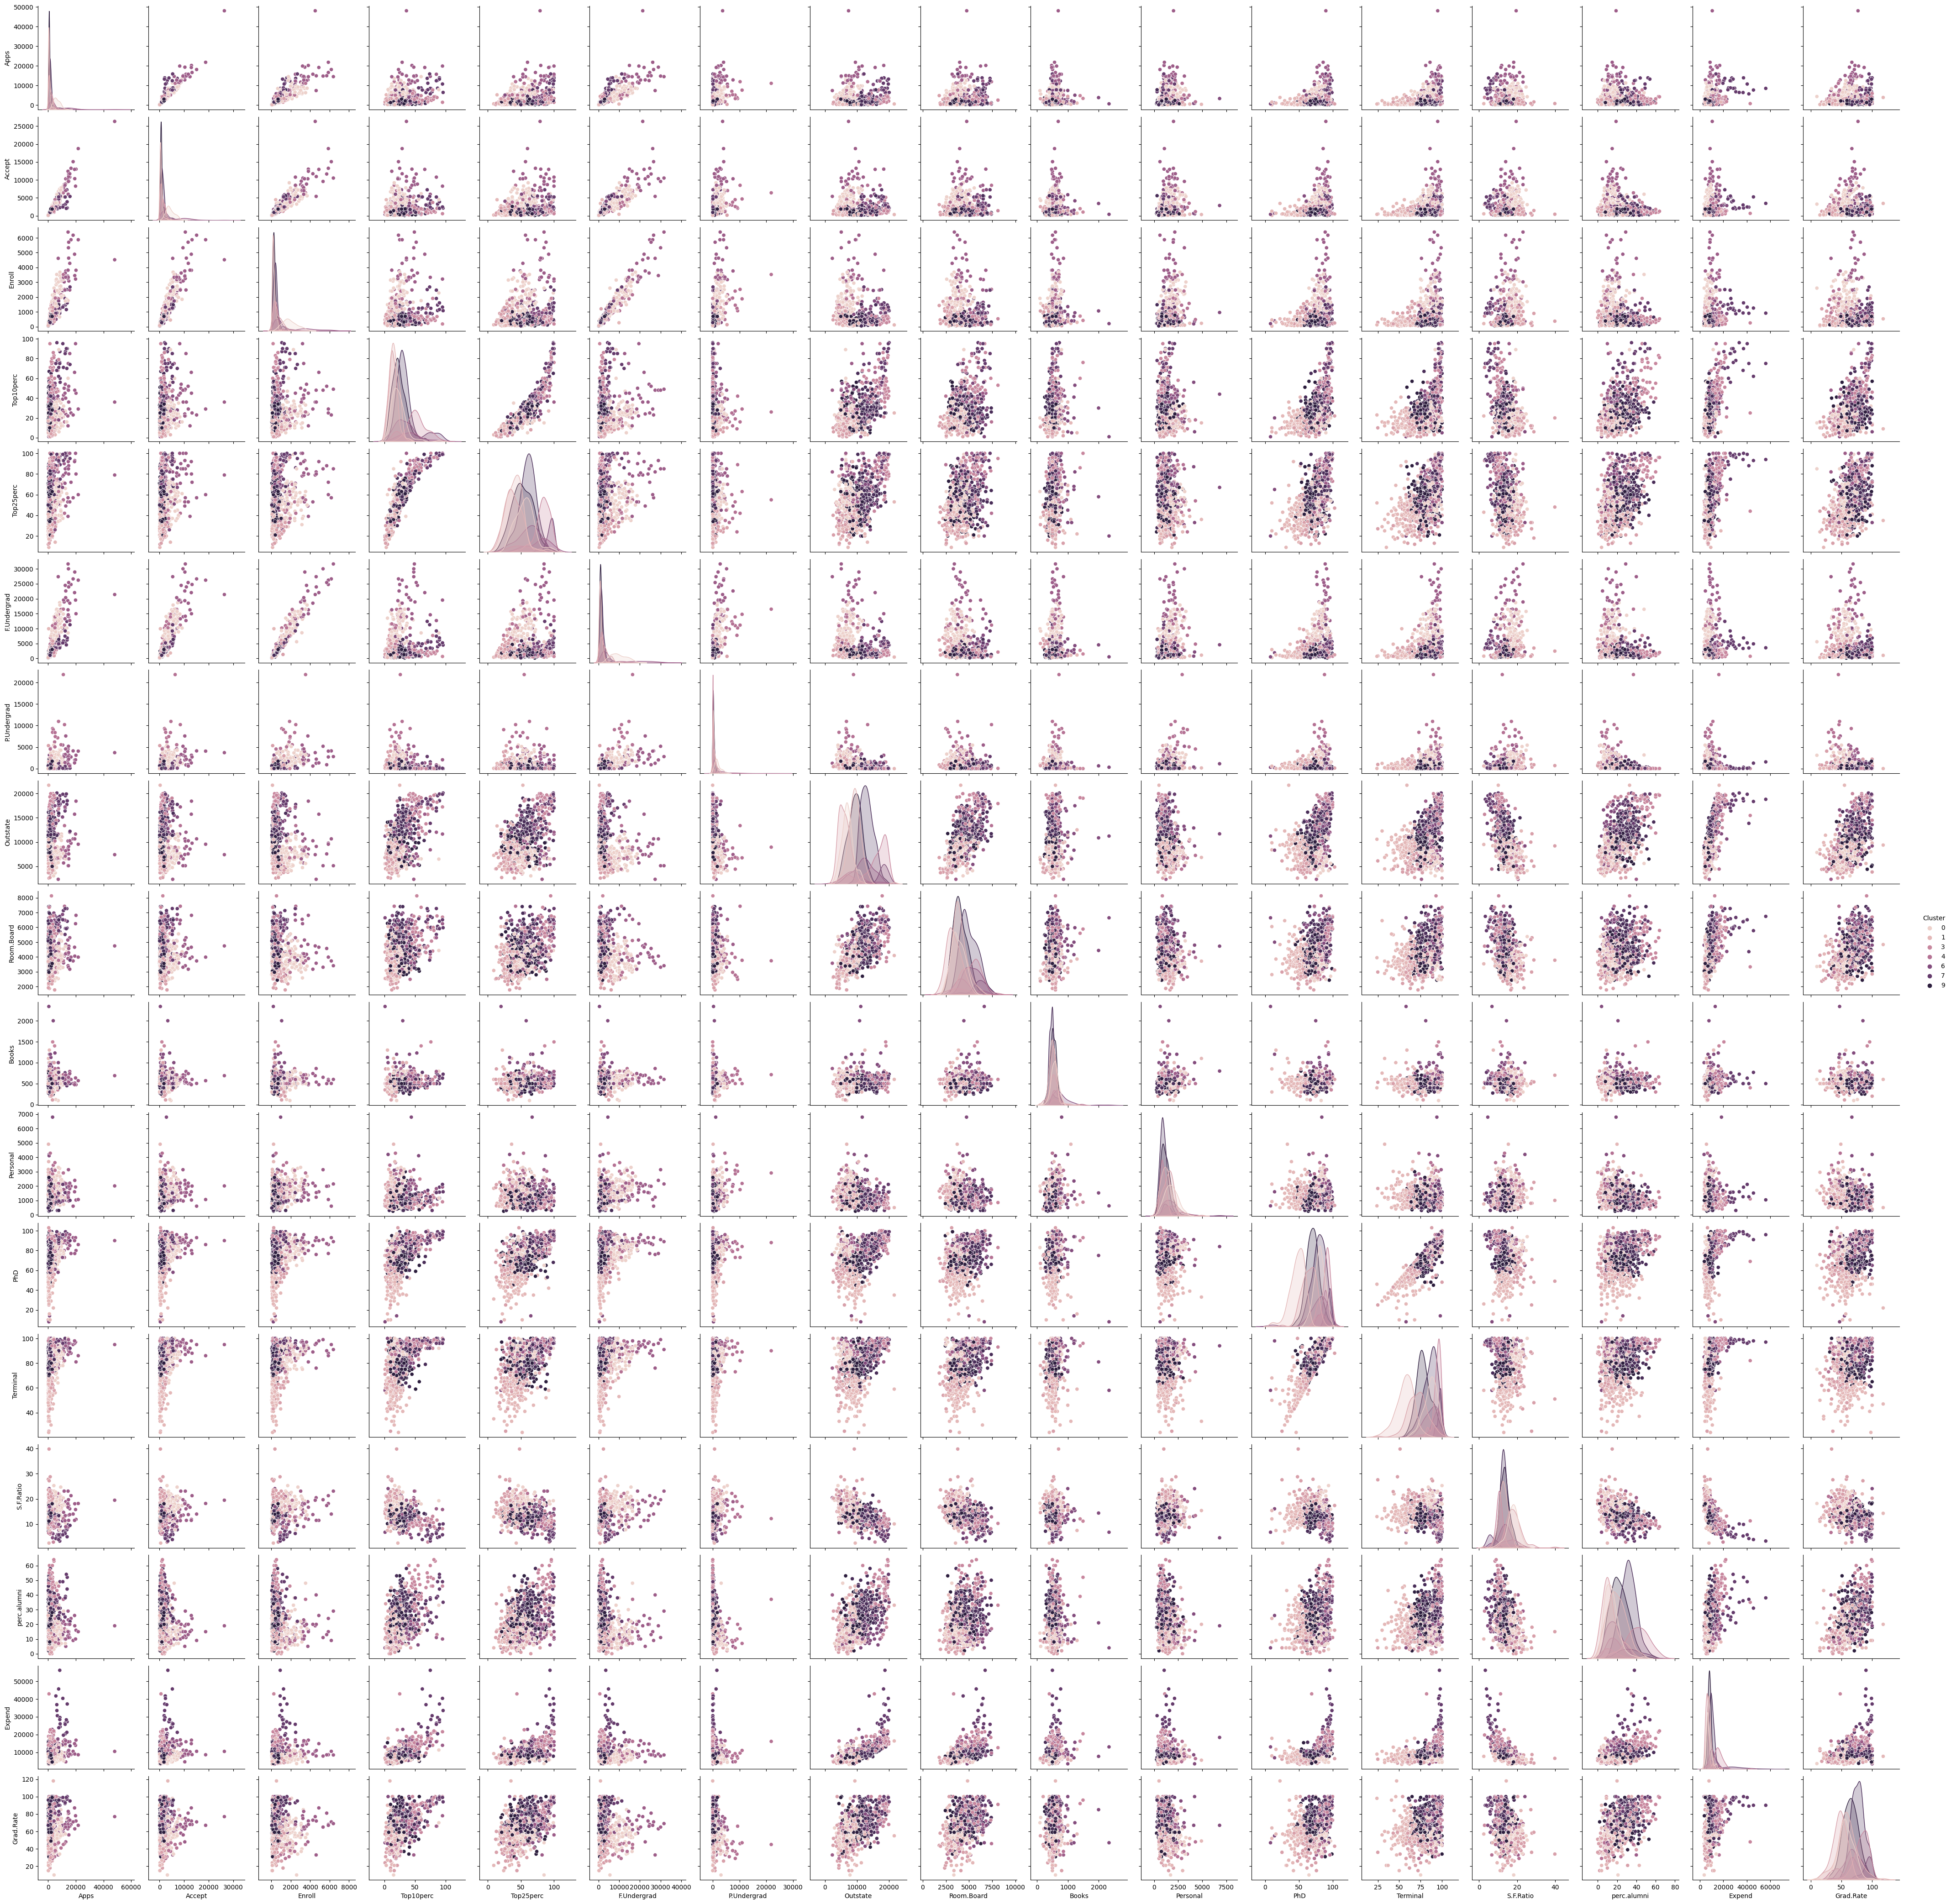

In [7]:
import seaborn as sns

sns.pairplot(data, hue='Cluster', diag_kind='kde')
plt.show()


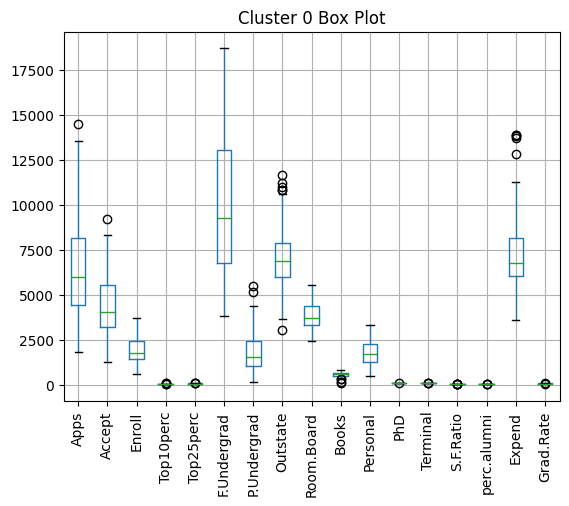

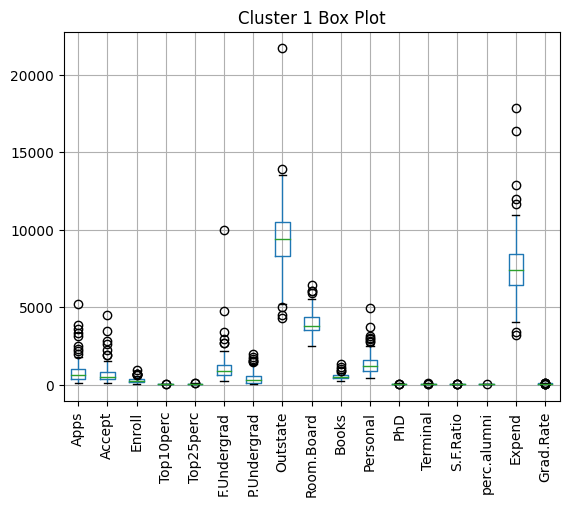

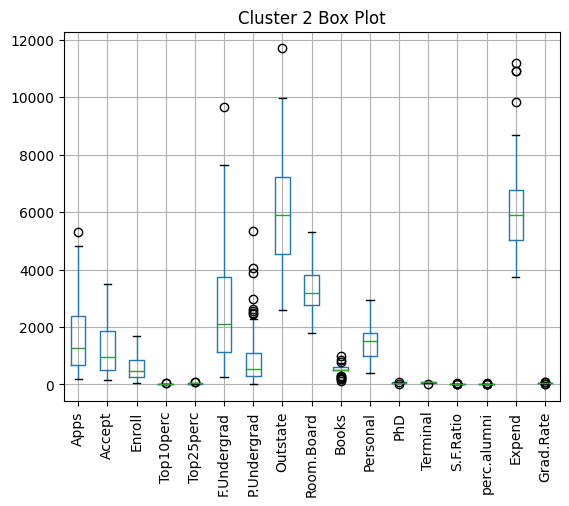

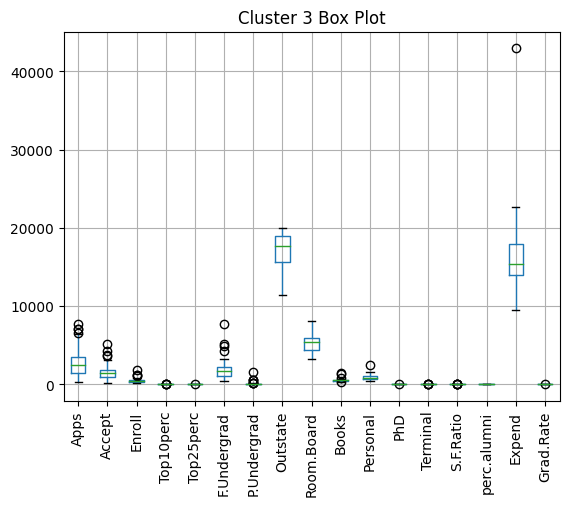

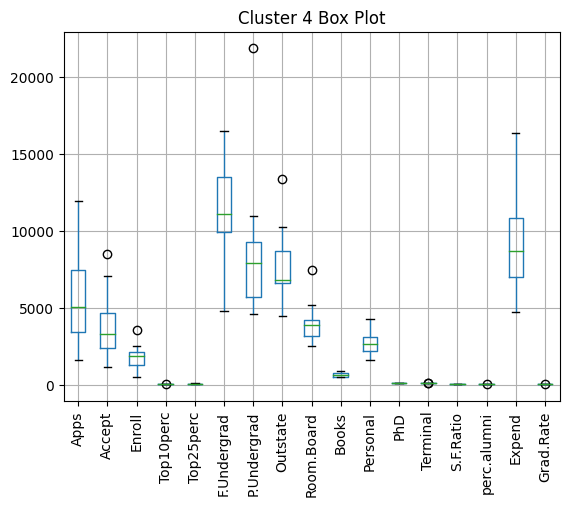

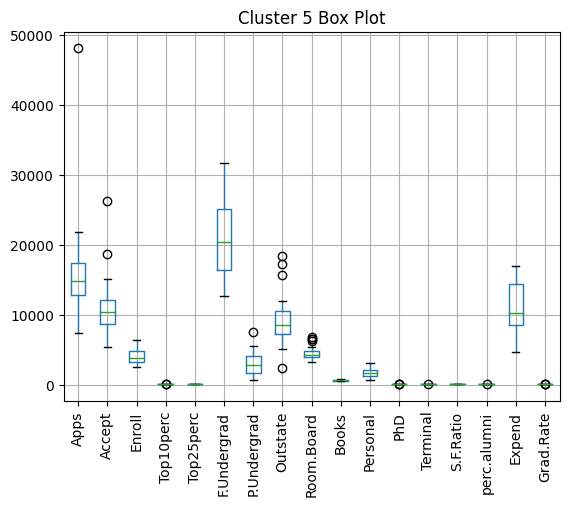

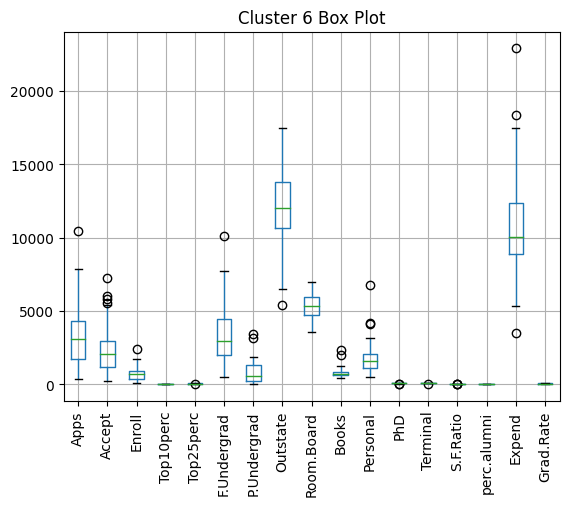

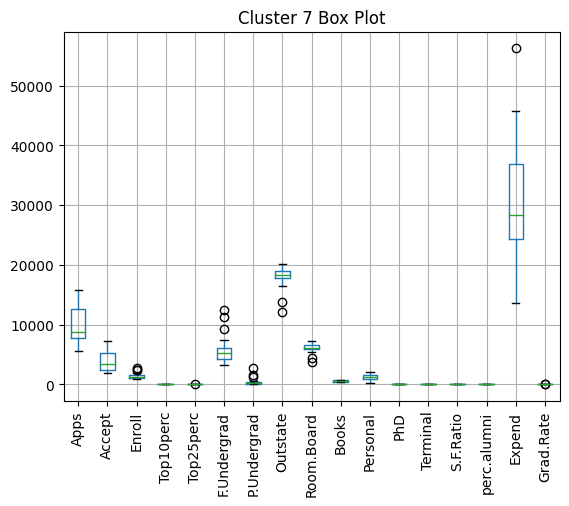

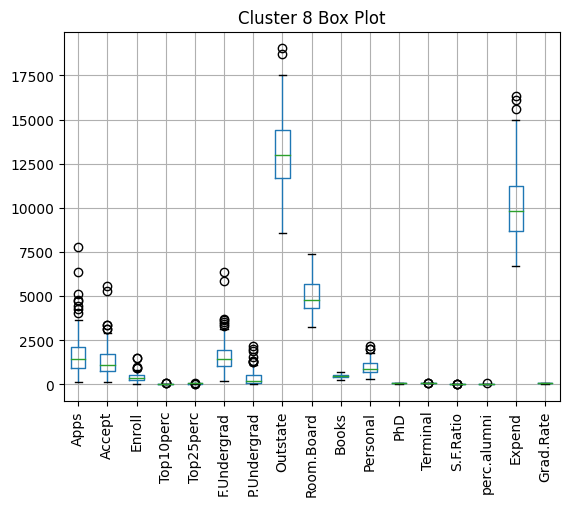

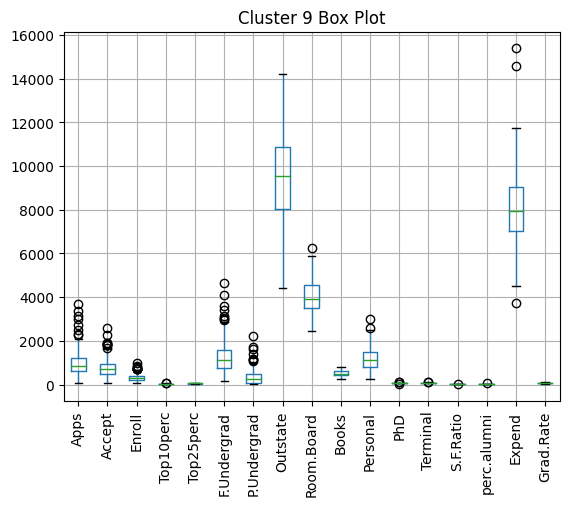

In [8]:
for cluster_num in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    cluster_data[selected_columns].boxplot(rot=90)
    plt.title(f'Cluster {cluster_num} Box Plot')
    plt.show()


Average silhouette score: 0.11198155612121635


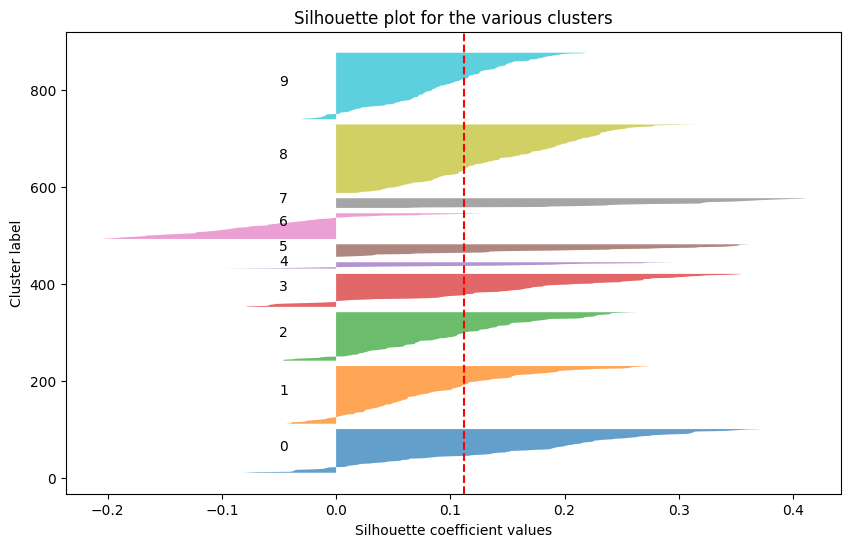

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Average silhouette score:", silhouette_avg)

sample_silhouette_values = silhouette_samples(X_scaled, clusters)

# Create silhouette plot
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_values = sample_silhouette_values[clusters == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for the various clusters")
plt.show()
